In [1]:
import numpy as np
import numpy.linalg as la
import scipy.sparse as sps
import scipy.sparse.linalg as spsla
import matplotlib.pyplot as plt
import sys


In [2]:
sys.path.append('../..')
import problems, projection, optimize

# testing problems
---

-  __1D blur__
> - pixels = 200
> - ROI(k) = 10, ... , 190 with 3 steps
> - $\lambda$ = 1e-4, ... , 1e4 with 5 steps
> - B = identity

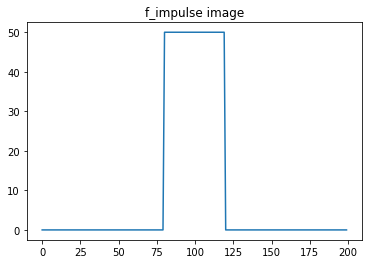

=================== setup ====================
(n_1, n_2, m) = (200, None, 200)
problem       = 1D Blur
lam           = 1000
B             = <class 'scipy.sparse.dia.dia_matrix'>
ROI pixels    = 50
ROI row       = None

================== contents ==================
K_diag        = [ 1.  1.  1.  1.  1.]...[ 1.  1.  1.  1.  1.]
sigma         = 3
t             = 10
ESI?          = True
ESIN?         = True
direct?       = True
================= dimensions ==================
Kb shape      = (200, 200)
X shape       = (200, 200)
M shape       = (50, 200)
B shape       = (200, 200)
sx shape      = (200, 1)
sb shape      = (200, 1)
============= system dimensions ===============
ESI_A shape   = (400, 400)
ESI_b shape   = (400,)
ESIN_A shape  = (400, 400)
ESIN_b shape  = (400,)


/Users/jakeroth/anaconda/lib/python2.7/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:102: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)


In [3]:
# single test
## problem
n_1 = 200
k = 50
lam = 1000
sigma = 3
t = 10
p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, ESI=True, dir_soln=True)
p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
p.summarize()

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.00E+03
            k: 50
    max iters: 50
    tolerance: 1e-05
    raar step: 2
      dr step: 2
     beta: 0.05
===== method = all ======================================================================



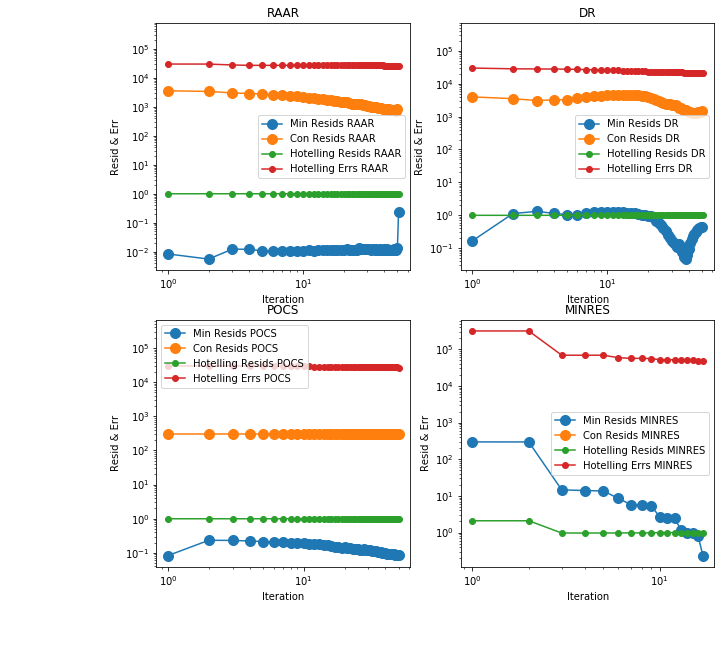

In [4]:
## examples: solve problem - - - - - - - - - - - - - - - - -
# projection.test_proj_alg(prob=p, method='pocs')
# projection.test_proj_alg(prob=p, method='dr', sl=1.25)
# projection.test_proj_alg(prob=p, method='raar')
# projection.test_proj_alg(prob=p, method='minres')
m_r, c_r, h_r, h_e = projection.test_proj_alg(prob=p, method='all',max_iter=50, beta=0.05)

In [5]:
# set blur parameters
sigma  = 3
t      = 10
sparse = True

# set dimensions
n_1    = 200
kk     = np.linspace(10, 190, 3)

# set regularization by first generating blur on test problem
tp = problems.Problem(prob='b', n_1=n_1, k=k, ESI=True, dir_soln=True)
tp._set_inputs(K_diag=np.ones(p.n), sigma=3, t=10, sparse=True)
tp._set_operators()
XtX = tp.X.toarray().T.dot(tp.X.toarray())
kappa = la.cond(XtX)

lamlam = [0.1, 1, 10]
lamlam = [0.01] + [kappa*lam for lam in lamlam]

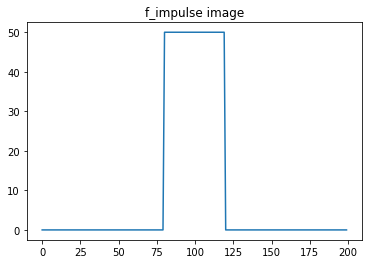

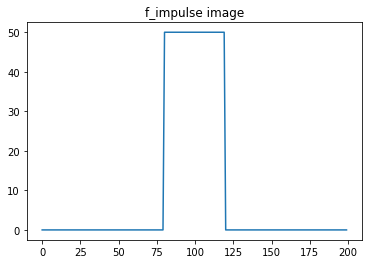

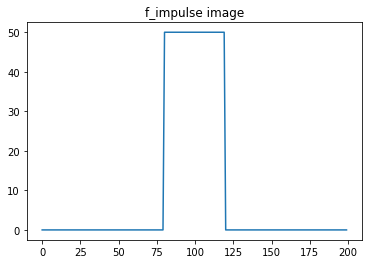

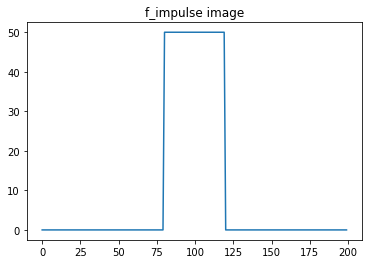

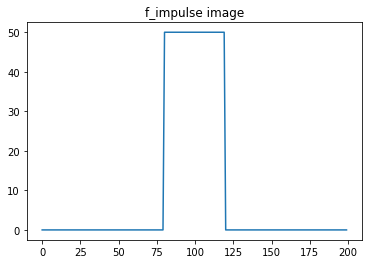

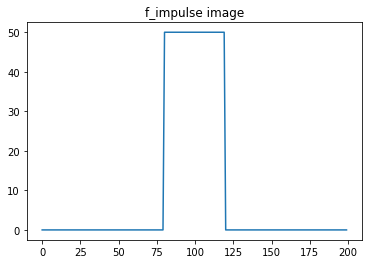

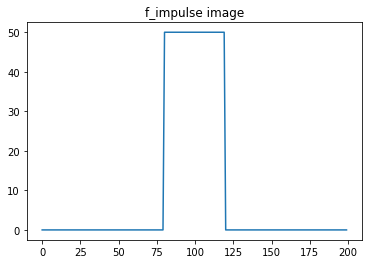

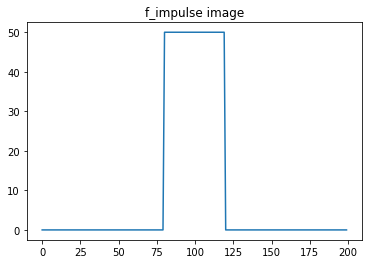

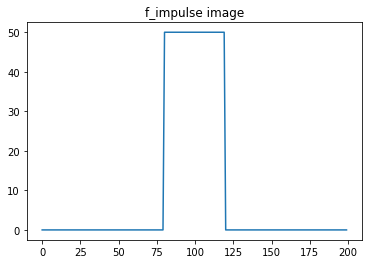

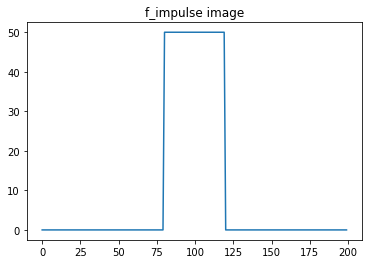

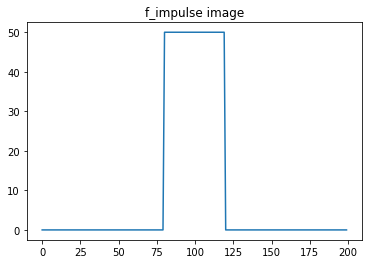

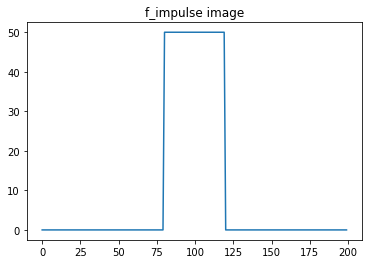

In [6]:
# create problems
ps = []
for k in kk:
    for lam in lamlam:
        p = problems.Problem(prob='b', n_1=n_1, k=k, lam=lam, ESI=True, dir_soln=True)
        p.create_problem(K_diag=np.ones(p.n), sigma=sigma, t=t, sparse=True)
        ps.append(p)

In [7]:
# # solve problems
# for p in ps:
#     projection.test_proj_alg(prob=p, method='pocs')
#     projection.test_proj_alg(prob=p, method='dr', sl_dr=1.5)
#     projection.test_proj_alg(prob=p, method='raar', beta=0.5)
#     projection.test_proj_alg(prob=p, method='minres')


(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.00E-02
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



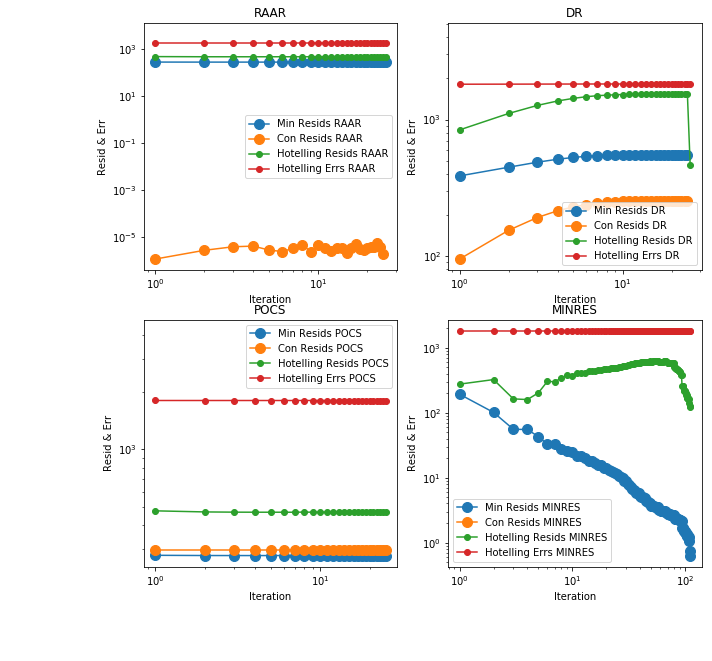

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[494.52624560858027, 494.52624560858027, 494.52624560858027, 494.52624560858027]
[1811.069106952217, 1811.069106952217, 1811.069106952217, 1811.069106952217]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+09
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



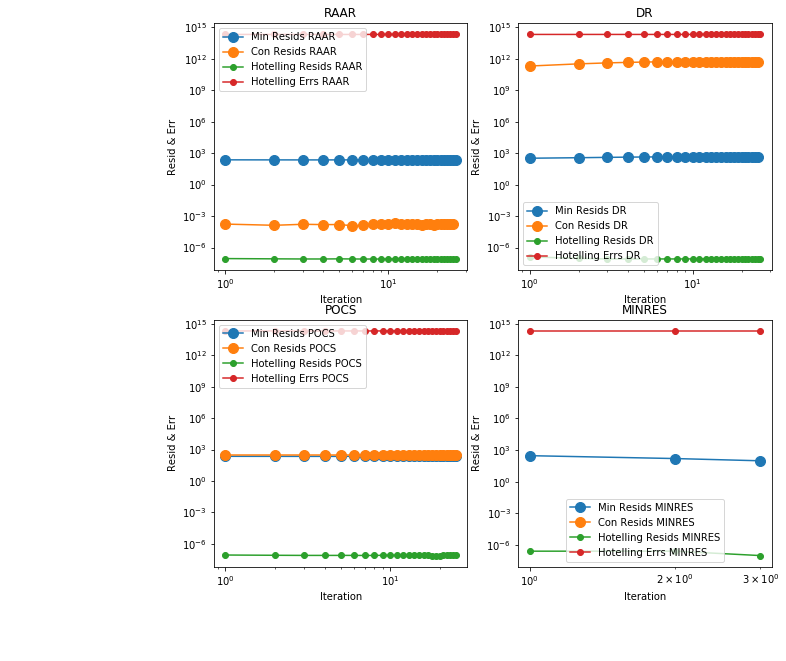

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077213667988e-07, 2.5636077213667988e-07, 2.5636077213667988e-07, 2.5636077213667988e-07]
[203858403169981.34, 203858403169981.34, 203858403169981.34, 203858403169981.34]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+10
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



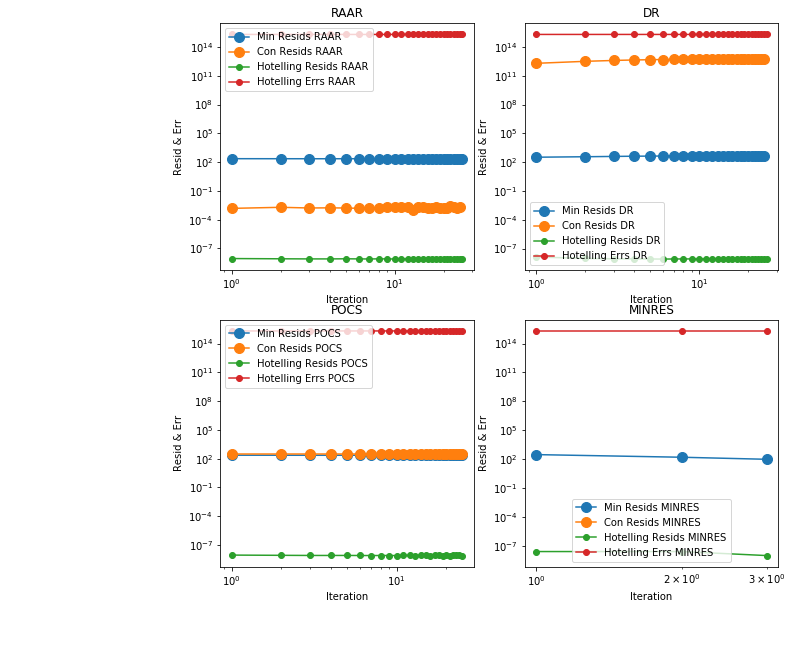

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077225470976e-08, 2.5636077225470976e-08, 2.5636077225470976e-08, 2.5636077225470976e-08]
[2038584031274968.2, 2038584031274968.2, 2038584031274968.2, 2038584031274968.2]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+11
            k: 10.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



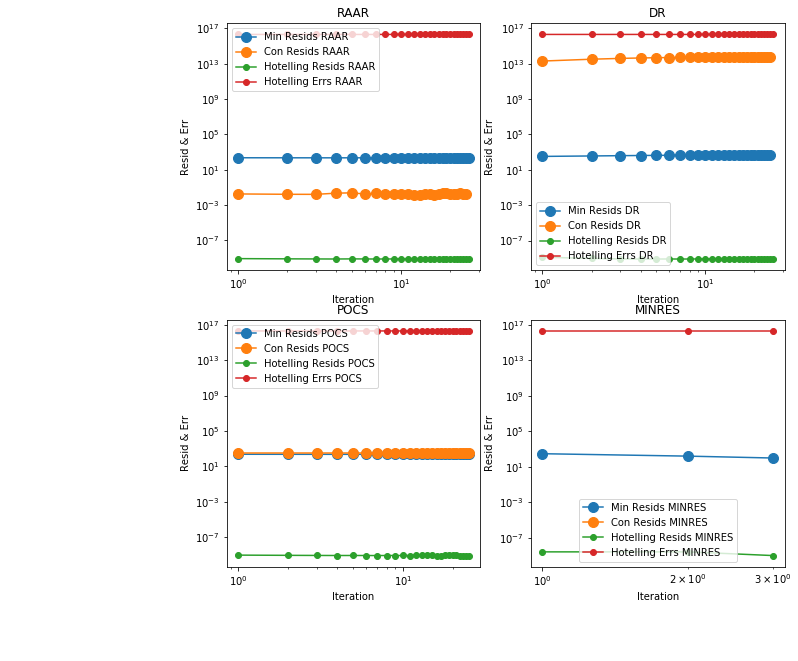

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.5636077226651281e-09, 2.5636077226651281e-09, 2.5636077226651281e-09, 2.5636077226651281e-09]
[20385840306000392.0, 20385840306000392.0, 20385840306000392.0, 20385840306000392.0]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.00E-02
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



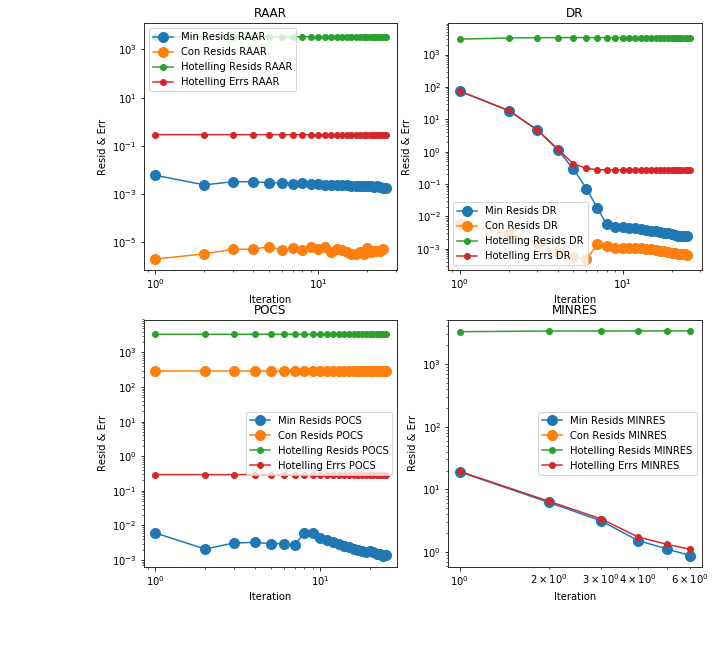

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[3088.5786901538331, 3088.5786901538331, 3088.5786901538331, 3088.5786901538331]
[299.79321156254667, 299.79321156254667, 299.79321156254667, 299.79321156254667]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+09
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



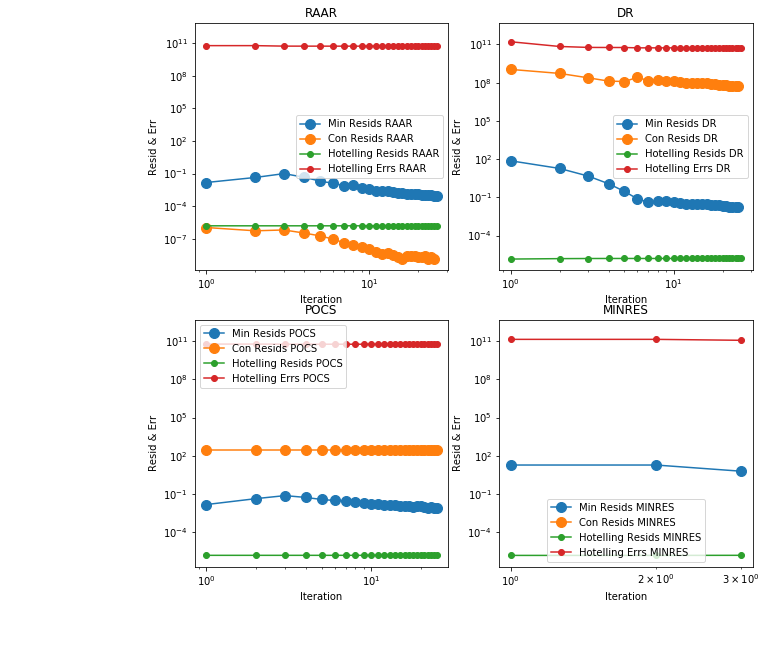

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196207467785e-06, 1.5213196207467785e-06, 1.5213196207467785e-06, 1.5213196207467785e-06]
[616746737911.7804, 616746737911.7804, 616746737911.7804, 616746737911.7804]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+10
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



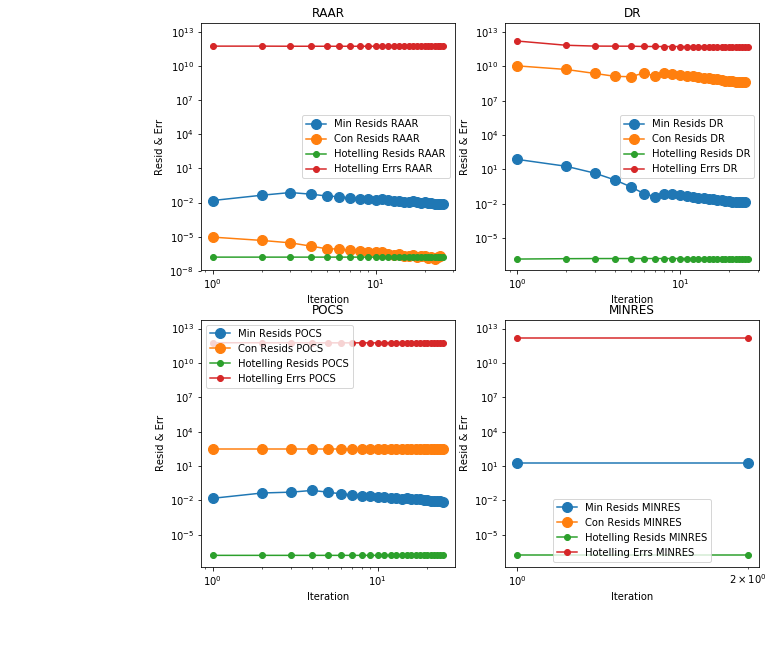

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214272971e-07, 1.5213196214272971e-07, 1.5213196214272971e-07, 1.5213196214272971e-07]
[6167467379430.8604, 6167467379430.8604, 6167467379430.8604, 6167467379430.8604]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+11
            k: 100.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



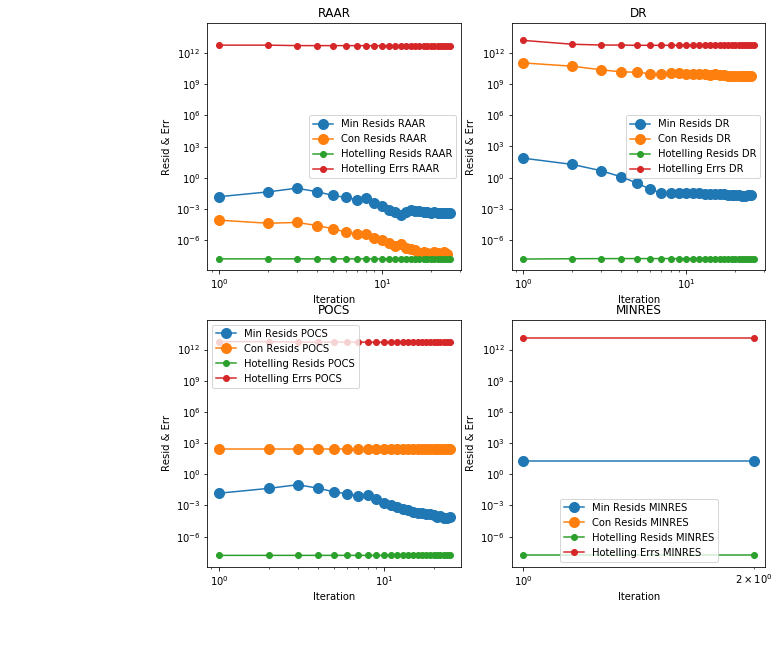

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[1.5213196214953515e-08, 1.5213196214953515e-08, 1.5213196214953515e-08, 1.5213196214953515e-08]
[61674673790278.398, 61674673790278.398, 61674673790278.398, 61674673790278.398]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.00E-02
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



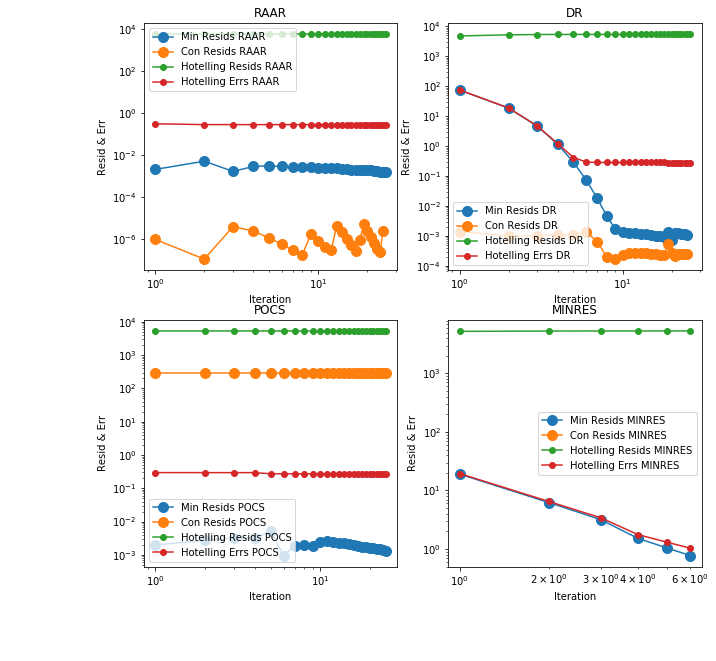

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[4257.3119277558289, 4257.3119277558289, 4257.3119277558289, 4257.3119277558289]
[299.79321156254719, 299.79321156254719, 299.79321156254719, 299.79321156254719]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+09
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



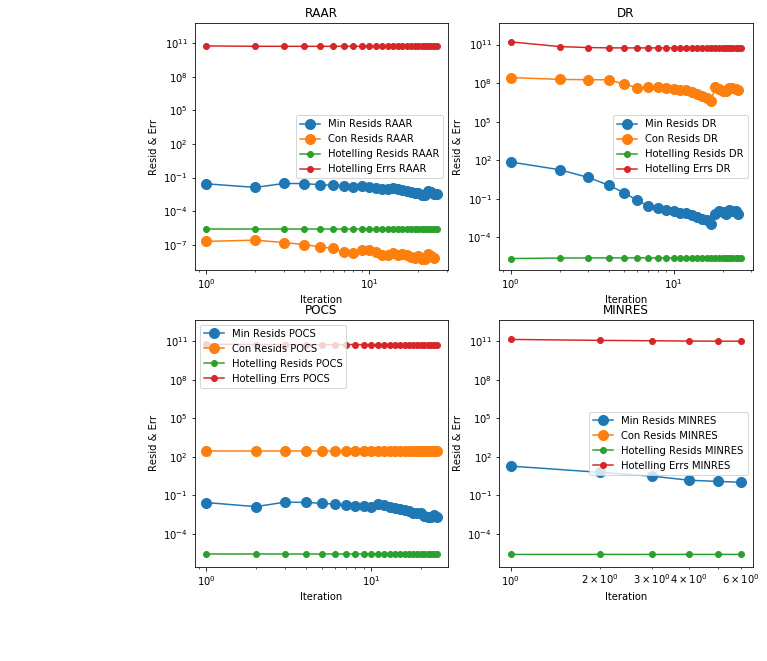

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943819885114e-06, 2.0969943819885114e-06, 2.0969943819885114e-06, 2.0969943819885114e-06]
[616746737492.59668, 616746737492.59668, 616746737492.59668, 616746737492.59668]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+10
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



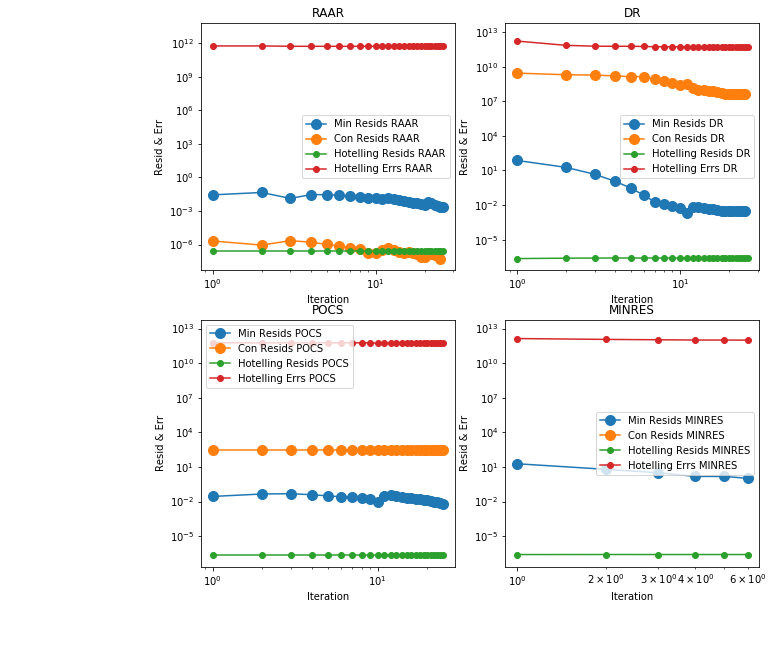

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943829265383e-07, 2.0969943829265383e-07, 2.0969943829265383e-07, 2.0969943829265383e-07]
[6167467379802.5322, 6167467379802.5322, 6167467379802.5322, 6167467379802.5322]

(0.0, 'raar constr 0')
(4196.0661446076901, 'raar resid 0')
(0.0, 'dr constr 0')
(4196.0661446076901, 'dr min 0')
(0.0, 'pocs constr 0')
(4196.0661446076901, 'pocs resid 0')
===== method = all ======================================================================
          lam: 1.95E+11
            k: 190.0
    max iters: 25
    tolerance: 1e-05
    raar step: 2
      dr step: 1.5
     beta: 0.5
===== method = all ======================================================================



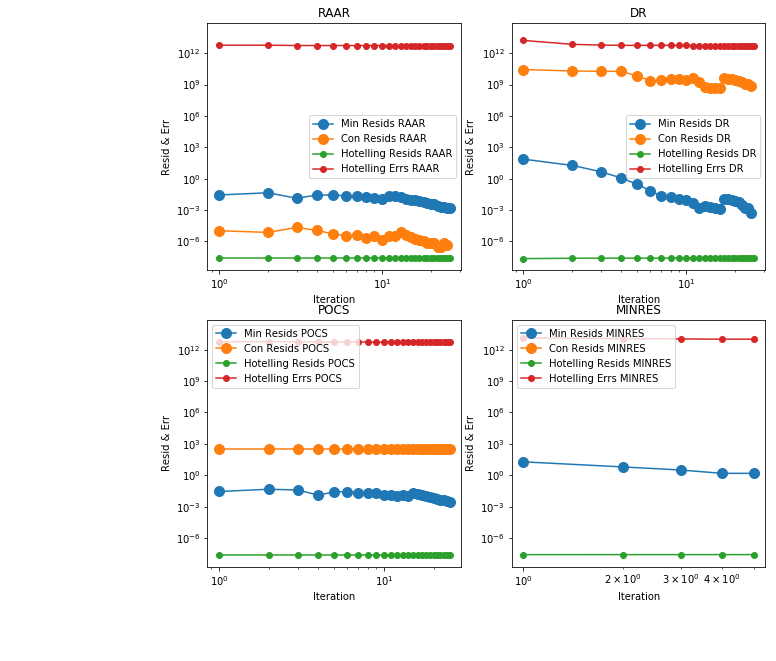

[4196.0661446076901, 4196.0661446076901, 4196.0661446076901, 296.70668251593816]
[0.0, 0.0, 0.0]
[2.0969943830203336e-08, 2.0969943830203336e-08, 2.0969943830203336e-08, 2.0969943830203336e-08]
[61674673846784.805, 61674673846784.805, 61674673846784.805, 61674673846784.805]



In [8]:
# solve problems
m_rs = []
c_rs = []
h_rs = []
h_es = []
for p,idx in zip(ps,range(len(ps))):
    m_r, c_r, h_r, h_e = projection.test_proj_alg(prob=p, method='all', sl_dr=1.5, beta=0.5, max_iter=25)
    m_rs.append([m_r[i][0] for i in range(4)])
    c_rs.append([c_r[i][0] for i in range(3)])
    h_rs.append([h_r[i][0] for i in range(4)])
    h_es.append([h_e[i][0] for i in range(4)])
    print(m_rs[idx])
    print(c_rs[idx])
    print(h_rs[idx])
    print(h_es[idx])
    print("")